In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
fashion_mnist=keras.datasets.fashion_mnist

In [4]:
(train_image,train_label),(test_image,test_label)=fashion_mnist.load_data()

In [5]:
import matplotlib.pyplot as plt

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187
   26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237
  255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234
  238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3   0   0 194 23

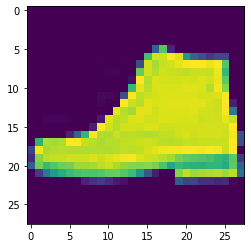

In [6]:
print(train_image[42])
print(train_label[42])
plt.imshow(train_image[42])

In [7]:
train_image=train_image/255.0
test_image=test_image/255.0

In [8]:
model=tf.keras.Sequential([keras.layers.Flatten(),
                          keras.layers.Dense(128,activation=tf.nn.tanh),
                          keras.layers.Dense(10,activation=tf.nn.softmax)])


In [9]:
model.compile(optimizer=tf.train.AdamOptimizer(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.fit(train_image,train_label,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4755 - acc: 0.8292
Epoch 2/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3676 - acc: 0.8661
Epoch 3/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3372 - acc: 0.8764
Epoch 4/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3117 - acc: 0.8857
Epoch 5/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2954 - acc: 0.8915
Epoch 6/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2803 - acc: 0.8960
Epoch 7/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2687 - acc: 0.9002
Epoch 8/10
60000/60000 [==============================] - 2s 42us/sample - loss: 0.2584 - acc: 0.9038
Epoch 9/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2484 - acc: 0.9072
Epoch 10/10
60000/60000 [==============================] - 3s 47us/sample - loss: 

In [11]:
model.evaluate(test_image,test_label)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.3533 - acc: 0.8724


[0.35329502950906755, 0.8724]

In [12]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        print(logs)
        if(logs.get('acc')>=0.8):
            print("\nReached 80% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [15]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_image, train_label, epochs=5, callbacks=[callbacks,tf.keras.callbacks.TerminateOnNaN()])



Epoch 1/5
59744/60000 [============================>.] - ETA: 0s - loss: 0.4774 - acc: 0.8295- ETA: 2s - loss: 0.4 - ETA: 1s - loss: 0.{'loss': 0.47724192404747007, 'acc': 0.82951665}

Reached 80% accuracy so cancelling training!
60000/60000 [==============================] - 8s 140us/sample - loss: 0.4772 - acc: 0.8295


In [ ]:
len(test_image)